In [1]:
import sys
sys.path.append(R'E:\Data science\Titanic dataset\notebooks')

# Importing needed libraries
from auto_imports import *
model_results_imports()
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

Load training dataset and predicting dataset

In [2]:
train_RF_df = pd.read_csv(r'E:\Data science\Titanic dataset\data\Processed data\Data Modeling\training_data.csv')
predict_RF_df = pd.read_csv(r'E:\Data science\Titanic dataset\data\Processed data\Data Modeling\predicting_data.csv')

train_RF_df.head()

,Pclass,Age,SibSp,Parch,Fare,cell_number,Cabin_letter,Title,FamilyName,Special Agent/route,TicketBatch,SharedTicket,Male,Embarked_C,Embarked_S,Survived
0,3,-0.584430,1,0,-0.310164,0.292641,0.316422,0.146343,0.000000,0.141080,0,0,1,0,1,0
1,1,0.643003,1,0,2.446672,0.377331,0.315796,0.805228,0.377331,0.607499,0,0,0,1,0,1
2,3,-0.277572,0,0,-0.281103,0.299576,0.324915,0.697310,0.378766,0.474557,0,0,0,0,1,1
3,1,0.412859,1,0,1.663824,0.000000,0.324915,0.779460,0.000000,0.385045,0,0,0,0,1,1
4,3,0.412859,0,0,-0.275721,0.292641,0.316422,0.146343,0.377331,0.380491,0,0,1,0,1,0


In [3]:
train_RF_df['Survived'].unique()

array([0, 1])

### Fitting the model

In [4]:
# Spliting x and y
X = train_RF_df.drop('Survived' , axis =1)
y= train_RF_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42 ,
                                                    stratify=y)

In [5]:
# Fitting the model
RF_ = RandomForestClassifier(random_state=42)

# Use accuracy_f1_scores to get f1_score and accuracy score 

Accuracy , f1 = accuracy_f1_scores(X_train , y_train, RF_)

CV=5 , random_state=42 , shuffel=True
accuracy:  0.8232374100719424
f1:  0.7532824130715273
   Accuracy score  F1 score
0        0.850000  0.783505
1        0.827338  0.744681
2        0.798561  0.730769
3        0.784173  0.711538
4        0.856115  0.795918


In [6]:
RF_.fit(X_train , y_train) # Fitting the model

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
# See accuracy and f1 drop percentage
accuracy_DP , f1_DP , y_pred = drop_percentages(X_test , y_test , RF_ , Accuracy , f1).values()

print('Accuracy drop percentage: ' , accuracy_DP)
print('F1 drop percentage: ' , f1_DP)

Accuracy drop percentage:  1.2%
F1 drop percentage:  1.7%


This a good percentage, so:
#### Model results:
- Accuracy: 82%
- F1: 75%
- Accuracy Drop percentage: 1.2%
- F1 drop percentage: 1.7%
> This model is strongly fitted and very strong model

[Text(0, 0.5, 'Not survived'), Text(0, 1.5, 'Survived')]

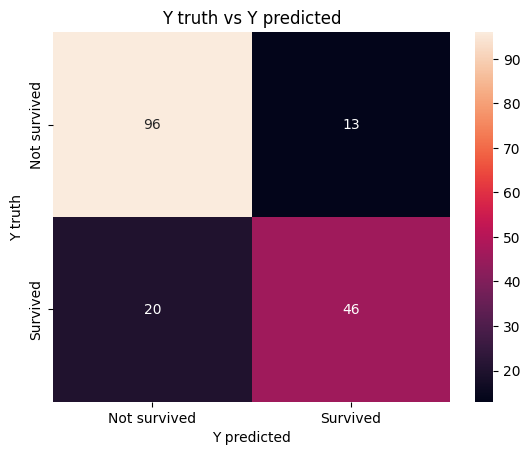

In [8]:
# plotting confusion matrix in heatmap
cm = confusion_matrix(y_test , y_pred)
plt.title('Y truth vs Y predicted')
ax = sns.heatmap(cm ,annot=True)
plt.xlabel('Y predicted')
plt.ylabel('Y truth')
ax.set_xticklabels(['Not survived' , 'Survived'])
ax.set_yticklabels(['Not survived' , 'Survived'])

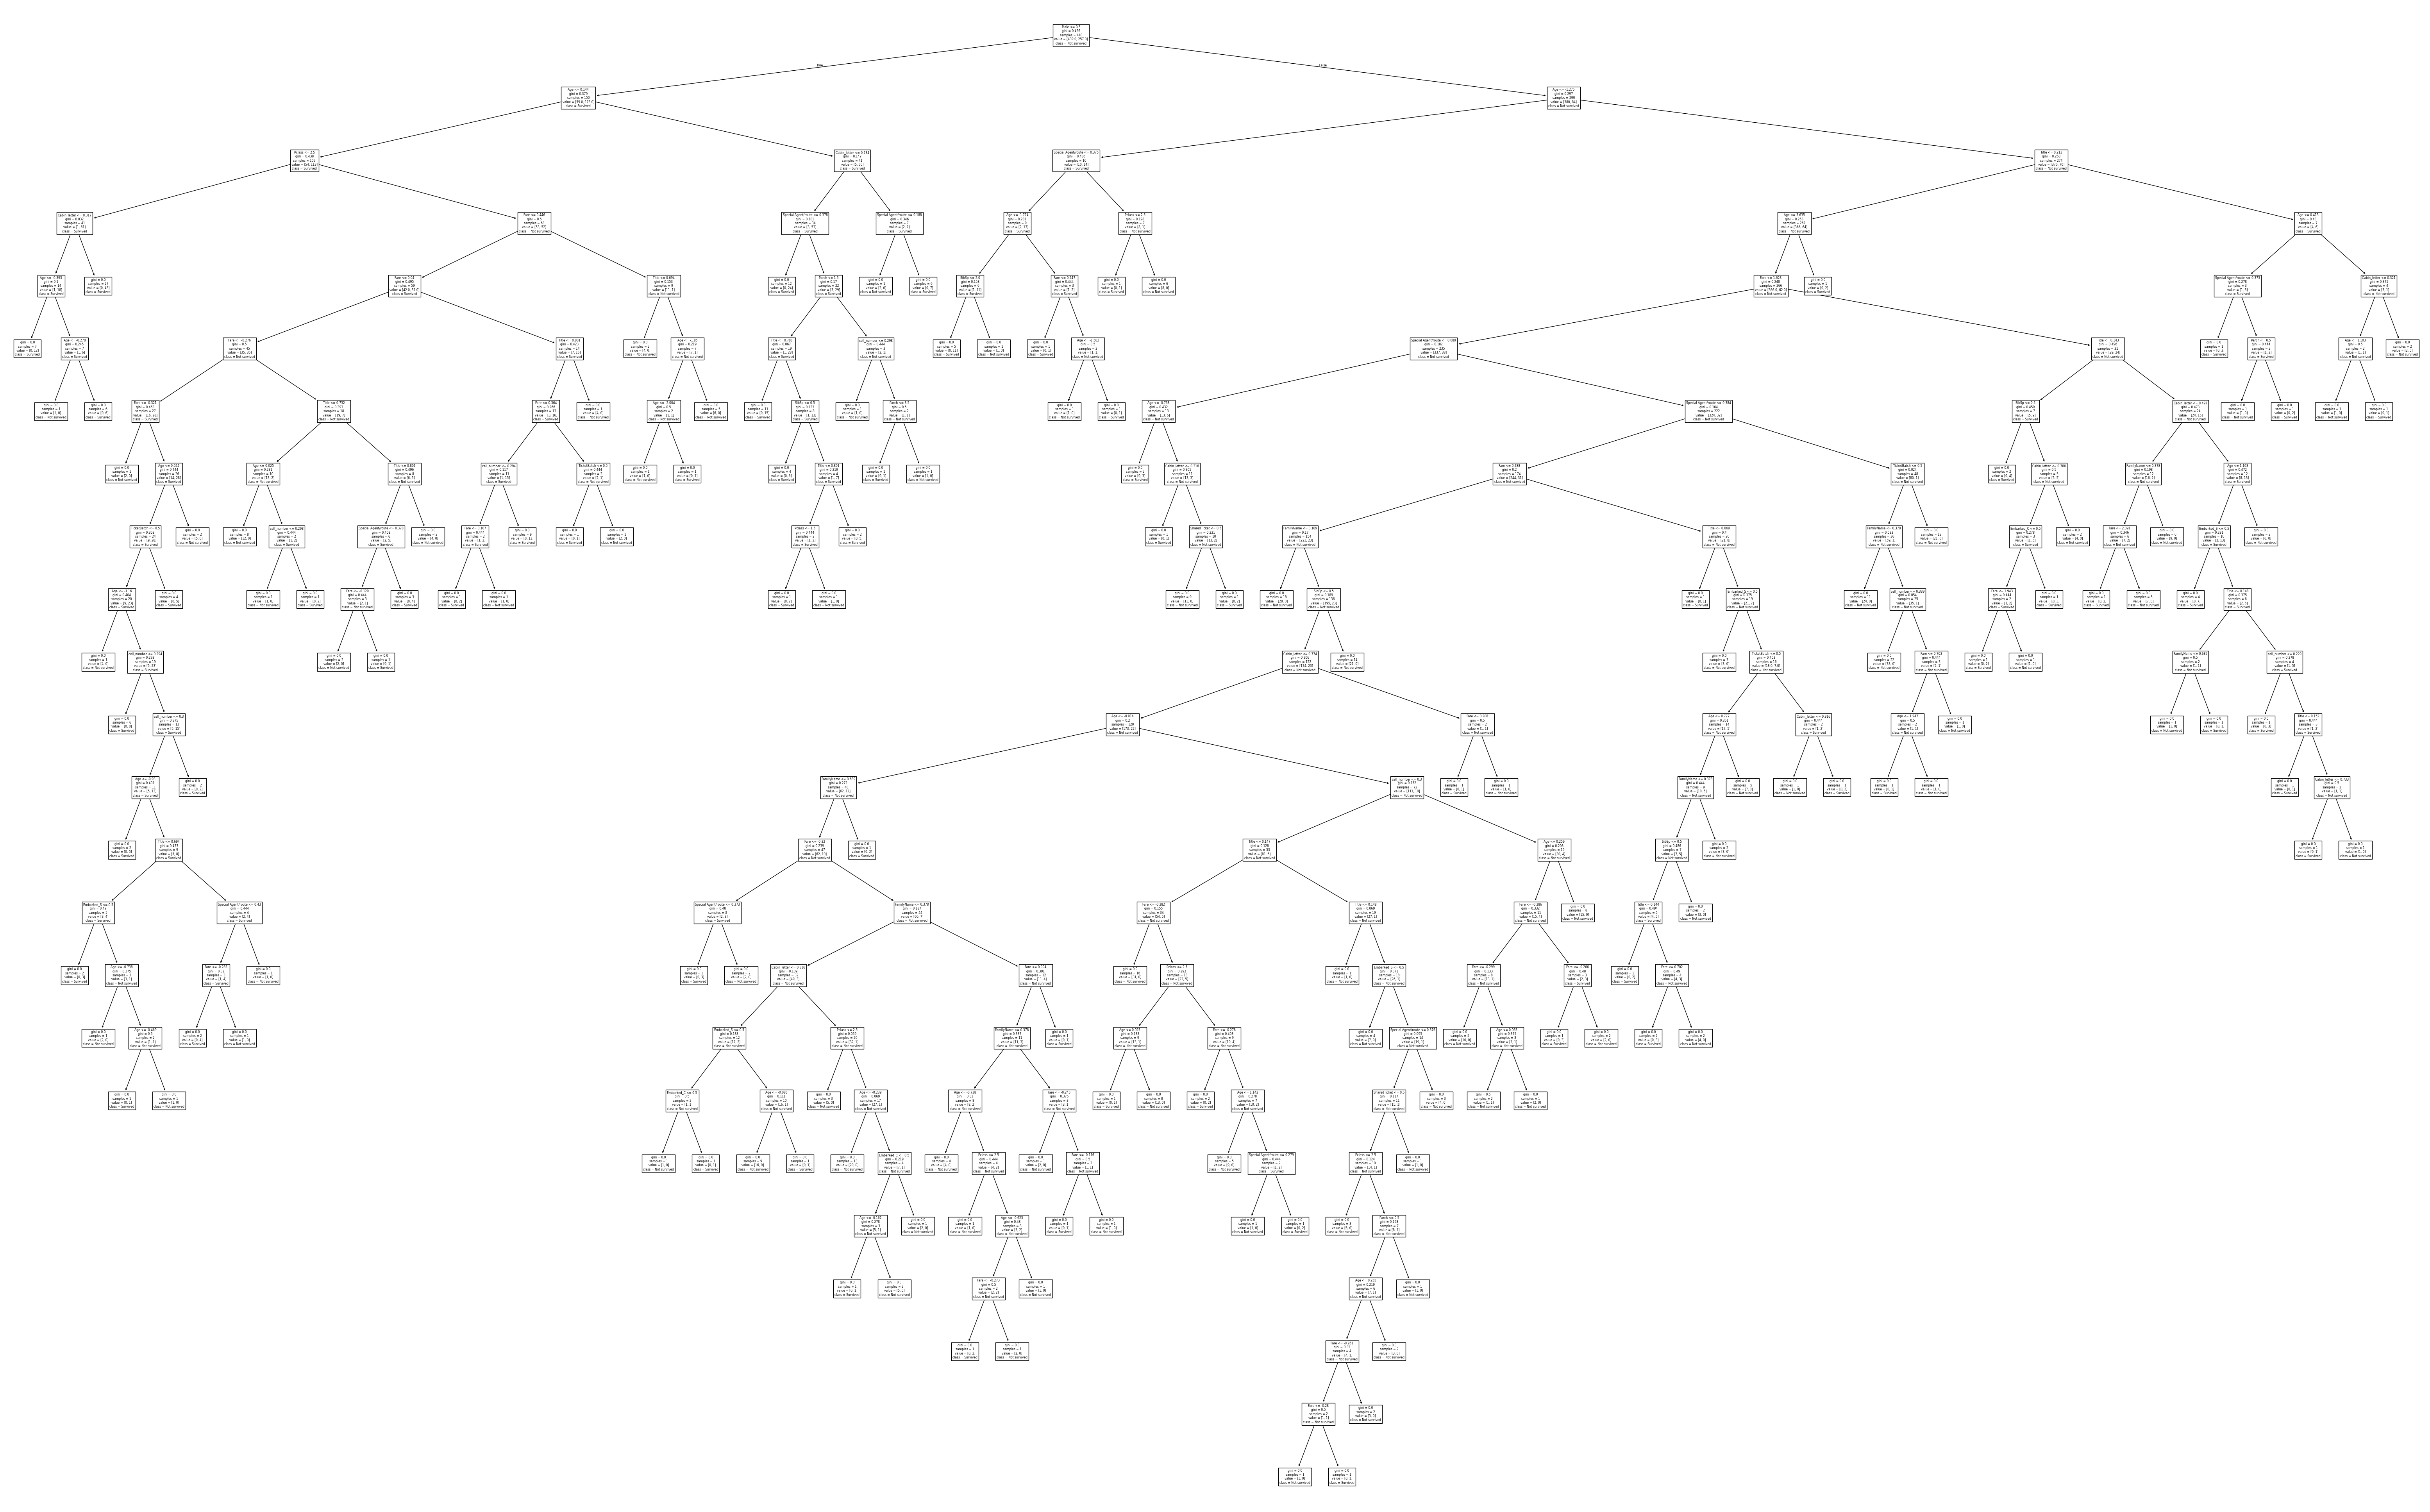

In [9]:
plt.figure(figsize=(80,50)) # plotting random forest diagram
plot_tree(RF_.estimators_[0] , feature_names=X_train.columns , class_names=['Not survived' , 'Survived'])
plt.show()

In [10]:
predict_RF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           409 non-null    int64  
 1   PassengerId          409 non-null    int64  
 2   Pclass               409 non-null    int64  
 3   Age                  409 non-null    float64
 4   SibSp                409 non-null    int64  
 5   Parch                409 non-null    int64  
 6   Fare                 409 non-null    float64
 7   cell_number          409 non-null    float64
 8   Cabin_letter         409 non-null    float64
 9   Title                409 non-null    float64
 10  FamilyName           409 non-null    float64
 11  Special Agent/route  409 non-null    float64
 12  TicketBatch          409 non-null    int64  
 13  SharedTicket         409 non-null    int64  
 14  Male                 409 non-null    int64  
 15  Embarked_C           409 non-null    int

In [11]:
# predict our predict_df values

predict_RF_df['Survived_RF_pred'] = RF_.predict(predict_RF_df.drop(['PassengerId' ,  'Survived_pred_logit'] , axis=1))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Survived_RF_pred
- Unnamed: 0


In [ ]:
# save dataset as a csv file
predict_RF_df.to_csv('E:\Data science\Titanic dataset\data\Processed data\Data Modeling\predicting_data.csv')